In [1]:
#ad for best luxury vehicle 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [2]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

In [3]:
dataset.describe()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,0.170300,0.129500,0.072800,0.119600,0.269500,0.012600,0.111200,0.209100,0.095200,0.04890
std,0.375915,0.335769,0.259821,0.324509,0.443722,0.111546,0.314395,0.406686,0.293506,0.21567
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [71]:
dataset.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [6]:
#Implement Random Selection 
import random
N = 10000
d = 10
ads_selected = []
total_reward = 0
for n in range(0,N):
    ad = random.randrange(d)
    ads_selected.append(ad)
    reward = dataset.values[n,ad]
    total_reward = total_reward+reward

Text(0,0.5,'Frequence of Ad Selection')

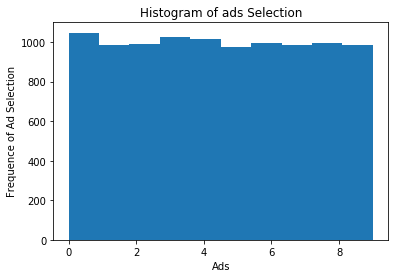

In [7]:
#Visualize Results Histogram 
plt.hist(ads_selected)
plt.title('Histogram of ads Selection')
plt.xlabel('Ads')
plt.ylabel('Frequence of Ad Selection')

In [8]:
total_reward

1247

# Implementing UCB

In [60]:
no_of_selections = [0]*len(dataset.columns)
sums_of_rewards = [0]*len(dataset.columns)
ads_selected = []

In [61]:
total_reward = 0
for n in range(0,dataset.index.size):
    ad = 0
    max_upper_bound = 0
    for i in range(0,10):
        if no_of_selections[i]>0:
            avg_reward = sums_of_rewards[i]/no_of_selections[i]
            delta_i = math.sqrt((3/2)* (math.log(n+1)/no_of_selections[i]))
            upper_bound = avg_reward+delta_i
        else:
            upper_bound = 1e400
        if upper_bound>max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
        #if n<11:
         #   print(upper_bound, max_upper_bound, ad)
    ads_selected.append(ad)
    no_of_selections[ad] = no_of_selections[ad] +1
    reward = dataset.values[n,ad]
    sums_of_rewards[ad] = sums_of_rewards[ad]+ reward
    total_reward = total_reward+reward 
    #Visualizing Results 
    #if n<11:
     #       print(no_of_selections, reward, sums_of_rewards,total_reward)

In [62]:
print(total_reward)
print('\n')
print(sums_of_rewards)

2178


[120, 47, 7, 38, 1675, 1, 27, 236, 20, 7]


In [66]:
str(ads_selected[1500:2000])

'[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 2, 5, 6, 3, 8, 8, 8, 8, 1, 8, 7, 4, 9, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 7, 0, 6, 4, 1, 8, 3, 2, 5, 4, 4, 4, 4, 4, 4, 4, 7, 9, 0, 4, 6, 4, 1, 8, 7, 7, 7, 7, 3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 2, 5, 7, 4, 9, 6, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 8, 4, 3, 7, 4, 6, 4, 2, 5, 9, 0, 7, 4, 1, 8, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 7, 7, 7, 7, 6, 4, 0, 4, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 9, 2, 5, 7, 4, 1, 1, 1, 1, 1, 8, 3, 0, 4, 6, 4, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 4, 9, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 2, 5, 7, 4, 0, 3, 6, 4, 4, 4, 4, 4, 7, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 9, 8, 6, 3, 4, 4, 4, 4, 7, 2, 5, 0, 4, 4, 7, 1, 6, 4, 8, 9, 0, 3, 4, 7, 4, 2, 5, 4, 0, 6, 1, 4, 7, 8, 9, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 0, 4, 7, 7, 7, 7, 6, 2, 2, 2, 2, 2, 5, 4, 1, 3, 7, 2, 8, 4, 0, 9, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 7, 4, 6, 1, 3, 4, 0, 5, 8, 7, 7, 7, 7, 7, 7, 7, 4, 7, 7,

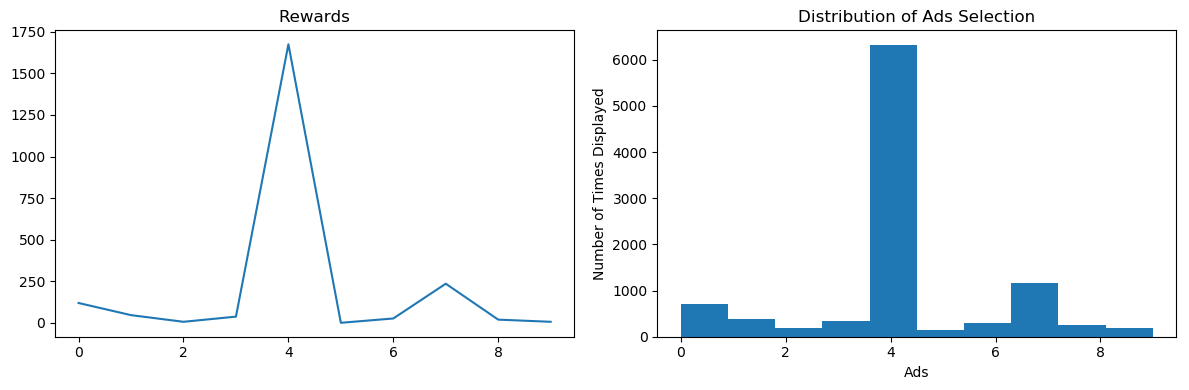

In [67]:
#Visualizing Results
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
fig.dpi=100
axes[0].plot(sums_of_rewards)
axes[0].set_title('Rewards')
axes[1].hist(ads_selected)
axes[1].set_title('Distribution of Ads Selection')
axes[1].set_xlabel('Ads')
axes[1].set_ylabel('Number of Times Displayed')
plt.tight_layout()

# Implement Thompson Sampling

Use Thompson Sampling to Improve Results. Add delayed feedback.

In [128]:
no_of_rewards1 = [0]*len(dataset.columns)
no_of_rewards0 = [0]*len(dataset.columns)
ads_selected = []

In [129]:
#Highest Probability of Success 
for n in range(0,dataset.index.size):
    ad = 0
    max_random = 0
    for i in range(0,10):
        random_beta = random.betavariate(no_of_rewards1[i]+1,no_of_rewards0[i]+1)
        if random_beta>max_random:
            max_random = random_beta
            ad = i
    ads_selected.append(ad)
    reward = dataset.values[n,ad]
    if reward == 1:
        no_of_rewards1[ad] +=1
    else:
        no_of_rewards0[ad] +=1 

total reward 2607


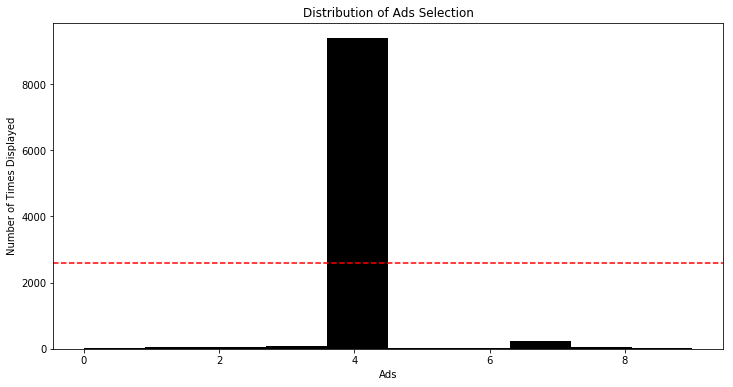

In [133]:
print('total reward',sum(no_of_rewards1))
#Visualizing Results
plt.figure(figsize=(12,6))
plt.hist(ads_selected,color='black')
plt.title('Distribution of Ads Selection')
plt.xlabel('Ads')
plt.ylabel('Number of Times Displayed')
plt.axhline(y=total_reward, color='r', linestyle='--')


In [1]:
#import dataset
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')
#impementing Thompson Sampling
ads_selected = []
d = len(dataset.count(axis=0))
pos_select = [0] * d #number of positive selections to round n
neg_select = [0] * d #number of negative selections to round n
for index, row in dataset.iterrows():
    random_draws = [0] * d
    for idx, val in enumerate(row):
        random_draws[idx] = random.betavariate(pos_select[idx] + 1, neg_select[idx] + 1)
    winner = random_draws.index(max(random_draws))
    if dataset.values[index, winner] == 1:
        pos_select[winner] += 1
    else:
        neg_select[winner] += 1
    ads_selected.append(winner)
total_hits = sum(pos_select)